#Portfolio Optimizer using Python

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [28]:
#Sample Portfolio for AANG
symbols = ['AAPL','AMZN','NFLX','GOOG']
weights = np.array([0.25,0.25,0.25,0.25]) #sum of weights should be 1 
stockstart = (datetime.now()-timedelta(days=10*365)).strftime('%Y-%m-%d') #5 years back from today
stockend = datetime.now().strftime('%Y-%m-%d')

In [29]:
#Dataset for adjusted close price
df = pd.DataFrame()
for stock in symbols:
  df[stock]=web.DataReader(stock,data_source='yahoo',start=stockstart,end=stockend)['Adj Close']
df.head()

,AAPL,AMZN,NFLX,GOOG
Date,,,,
2012-07-11,18.457092,10.9185,11.662857,284.528503
2012-07-12,18.288223,10.7680,12.138571,284.174835
2012-07-13,18.473577,10.9195,12.128571,287.183563
2012-07-16,18.532818,10.8005,11.854286,286.386566
2012-07-17,18.533737,10.8465,11.682857,287.288177


[]

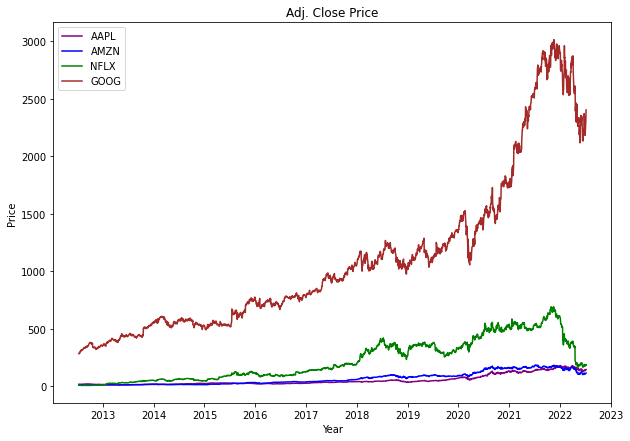

In [30]:
#Visualize Stock history
color=['purple','blue','green','brown']
plt.figure(figsize=(10,7))
for s,c in zip(symbols,color):
  plt.plot(df[s],color=c,label=s)

plt.title("Adj. Close Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(symbols,loc='best')
plt.plot()

In [31]:
returns = df.pct_change() #(new-old)/old
print(returns)

                AAPL      AMZN      NFLX      GOOG
Date                                              
2012-07-11       NaN       NaN       NaN       NaN
2012-07-12 -0.009149 -0.013784  0.040789 -0.001243
2012-07-13  0.010135  0.014070 -0.000824  0.010588
2012-07-16  0.003207 -0.010898 -0.022615 -0.002775
2012-07-17  0.000050  0.004259 -0.014461  0.003148
...              ...       ...       ...       ...
2022-07-01  0.016164  0.031541  0.029050 -0.002665
2022-07-05  0.018930  0.035962  0.032954  0.044059
2022-07-06  0.009607  0.007313 -0.009791  0.011648
2022-07-07  0.023999  0.017493  0.028306  0.035521
2022-07-08  0.004715 -0.006791 -0.012099  0.007229

[2515 rows x 4 columns]


In [32]:
#Annualized Covariance Matrix
cov_annual_mat = returns.cov()*252
print(cov_annual_mat)

          AAPL      AMZN      NFLX      GOOG
AAPL  0.082544  0.043667  0.039725  0.040813
AMZN  0.043667  0.099204  0.070357  0.050197
NFLX  0.039725  0.070357  0.236220  0.051436
GOOG  0.040813  0.050197  0.051436  0.068103


In [33]:
#Portfolio Variance
portfolio_variance = np.dot(weights.T, np.dot(cov_annual_mat,weights))
print(portfolio_variance)
e_var=0
for i in range(4):
  for j in range(4):
    e_var+=weights[i]*weights[j]*cov_annual_mat.loc[symbols[i],symbols[j]]

print(e_var)

# Portfolio Volatality/ Standard Deviation
portfolio_volatility = np.sqrt(portfolio_variance)
print(portfolio_volatility)

0.06740390722719987
0.06740390722719987
0.2596226246443092


In [9]:
#Annual Portfolio Return 
portfolio_annual_return = np.sum(returns.mean() * weights) * 252
portfolio_annual_return

0.2948812281175425

In [10]:
#Expected Annual Return , Variance , Standard Devaition (Risk)
percent_var = str(round(portfolio_variance*100,2))+'%'
percent_vols = str(round(portfolio_volatility*100,2))+'%'
percent_return = str(round(portfolio_annual_return*100,2))+'%'

print("Expected annual return: "+percent_return)
print("Annual volatality/risk: "+percent_vols)
print("Annual Variance: "+percent_var)

Expected annual return: 29.49%
Annual volatality/risk: 25.96%
Annual Variance: 6.74%


In [ ]:
!pip install PyPortfolioOpt

In [12]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [13]:
#Portfolio Optimization

mu = expected_returns.mean_historical_return(df)  #returns.sum()/5
S = risk_models.sample_cov(df) #same as annual_returns_covariance

#optimize max sharpe ratio 
ef = EfficientFrontier(mu,S) 
weights = ef.max_sharpe()
clean_weights = ef.clean_weights()
print(clean_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.27514), ('AMZN', 0.22015), ('NFLX', 0.12314), ('GOOG', 0.38157)])
Expected annual return: 25.3%
Annual volatility: 24.1%
Sharpe Ratio: 0.97


(0.25283737634821024, 0.24121977769318653, 0.9652499416708772)

In [14]:
sum(clean_weights.values())

1.0

In [15]:
#TO add module to predict new record 

In [23]:
#Mannual efficient frontier

mus = (1+returns.mean())**252 -1  #compounding effect
cov = returns.cov()*252

In [24]:
#Monte Carlo Approach of Random Portfolios
n_assets = 3
n_portfolios = 1000
mean_variance_pairs = []
np.random.seed(54)
for i in range(n_portfolios):
  assests = np.random.choice(list(returns.columns))

In [40]:
np.random.rand(3)

array([0.37412777, 0.93358217, 0.6481412 ])

In [35]:
annualized_returns = (1+returns.mean())**252 -1
annualized_returns

AAPL    0.283192
AMZN    0.330961
NFLX    0.485650
GOOG    0.281078
dtype: float64

In [39]:
list(returns.columns)

['AAPL', 'AMZN', 'NFLX', 'GOOG']

In [59]:
values=[]
n_port=10000
n=4
cov_annual = cov_annual_mat
for _ in range(n_port):
  flag=False
  while True:
    weights = np.random.rand(n)
    weights = weights/sum(weights)
    port_return = np.dot(weights,annualized_returns)
    port_risk = np.sqrt(np.dot(weights.T,np.dot(cov_annual,weights)))
    for e,r,w in values:
      if e>port_return and r<port_risk:
        flag=True
        break
    if flag:
      break
    row = [port_return,port_risk,weights]
    values.append(row)
    break
len(values)

1123

In [60]:
import pandas as pd
import numpy as np

def ef(n,df) ->list:
    returns = df.pct_change()
    values=[]
    cov_annual = returns.cov()*252
    annualized_returns = (1+returns.mean())**252 -1 #Returns with compounding effect
    np.random.seed(25)
    n_port = 10000
    for _ in range(n_port):
      flag=False
      while True:
        weights = np.random.rand(n)
        weights = weights/sum(weights)
        port_return = np.dot(weights,annualized_returns)
        port_risk = np.sqrt(np.dot(weights.T,np.dot(cov_annual,weights)))
        for e,r,w in values:
          if e>port_return and r<port_risk:
            flag=True
            break
        if flag:
          break
        row = [port_return,port_risk,weights]
        values.append(row)
        break
    return values

In [63]:
vals=ef(4,df)
len(vals)

1058

[[0.32694188724697293,
  0.2515783856442965,
  array([0.45386306, 0.30371987, 0.14544442, 0.09697265])],
 [0.37002101033488444,
  0.28905682834217533,
  array([0.24899232, 0.07109122, 0.41486719, 0.26504928])],
 [0.351835494417106,
  0.26775226036640565,
  array([0.38661508, 0.25514438, 0.27967   , 0.07857054])],
 [0.31797578062492604,
  0.2441762541177716,
  array([0.26063205, 0.34133162, 0.09444205, 0.30359428])],
 [0.3306832112308416,
  0.2517321103986811,
  array([0.14634209, 0.31381698, 0.1644495 , 0.37539143])],
 [0.32528485368533033,
  0.24603992340343647,
  array([0.20237807, 0.21716064, 0.16105054, 0.41941075])],
 [0.3007869803704653,
  0.23900474192955723,
  array([0.281365  , 0.30588179, 0.01884893, 0.39390429])],
 [0.32044909131515076,
  0.24355344027758816,
  array([0.20638301, 0.21419294, 0.13809444, 0.44132961])],
 [0.3240653750166861,
  0.24460931912113063,
  array([0.34492906, 0.23492903, 0.14928331, 0.27085859])],
 [0.3513675905446597,
  0.2660446187956328,
  array([0